plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [101]:
import matplotlib.pyplot as plt
import pandas as pd

#matplotlib notebook


In [102]:
# read simulation configuration file name
with open("Last.txt") as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

CERN_SPS_BWS41677.txt 



In [103]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=7)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [104]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [105]:
#print(dfc)
print(df)

            time        pos         npart      maxt      isem          ithc
0          0.461  -2.800000  5.813191e+11   300.000  0.000007  3.271431e-64
1          0.922  -2.799539  5.849292e+11   300.000  0.000007  3.271434e-64
2          1.383  -2.799078  5.885611e+11   300.000  0.000007  3.271437e-64
3          1.844  -2.798617  5.922150e+11   300.000  0.000007  3.271440e-64
4          2.305  -2.798156  5.958909e+11   300.000  0.000007  3.271443e-64
...          ...        ...           ...       ...       ...           ...
99995  46098.156  43.297695  0.000000e+00  1054.416  0.000000  2.306562e-10
99996  46098.617  43.298156  0.000000e+00  1054.412  0.000000  2.306153e-10
99997  46099.078  43.298617  0.000000e+00  1054.409  0.000000  2.305745e-10
99998  46099.539  43.299078  0.000000e+00  1054.405  0.000000  2.305336e-10
99999  46100.000  43.299539  0.000000e+00  1054.401  0.000000  2.304928e-10

[100000 rows x 6 columns]


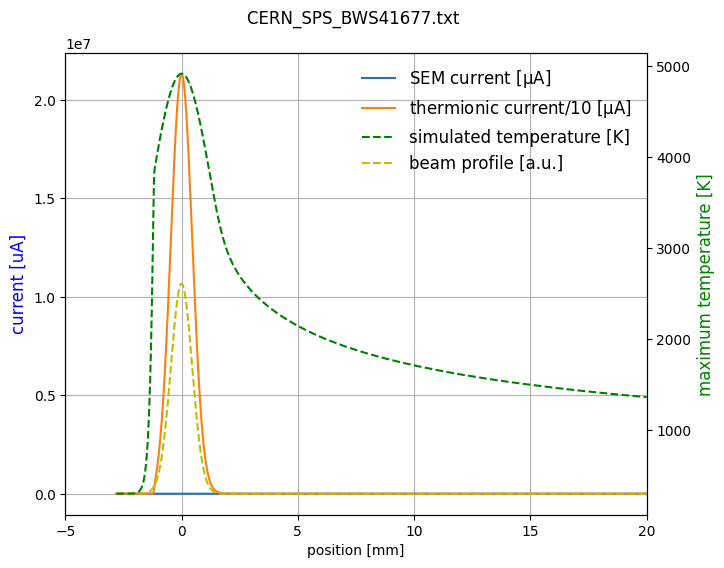

In [106]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

ax.set_xlim(-5,20)
# factor 2 is for 2 wires
hsimse, = ax.plot([x*1 for x in df["pos"]],[2*x for x in df["isem"]],label=r"SEM current [$\rm \mu A$]")
hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/10 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
#scale=3.0*df["isem"].max()/df["npart"].max()
scale=0.1*df["ithc"].max()/df["npart"].max()

hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)



axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

ax.legend(handles=[hsimse,hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
ax.grid()

plt.savefig('all.png')

In [31]:
print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])

dt [us] =  40.0


In [32]:
# max SEM current [uA] 
print(4*max(df['isem']))

0.2659474100432288
